# CO2 Emission Project

#### In this project, I analyzed data relating to cars and compared three different models (Engine, Fuel Consumption and the Cylinder Model) to predict CO2 emissions.

#### Skills: Simple linear Regression, Machine Learning, Data Visualization, Data Modeling, Data Evaluation using Statistics
#### Libraries: matplotlib, pandas, pylab, numpy

## Importing Libraries

In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['scikit-learn'])



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Data Understanding

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9 (Consumption of fuel in the city)
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9 (Consumption of fuel on the highway)
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2 (Average of Total Fuel consumption)
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

## Having a look at the data

In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


## Data Visualization

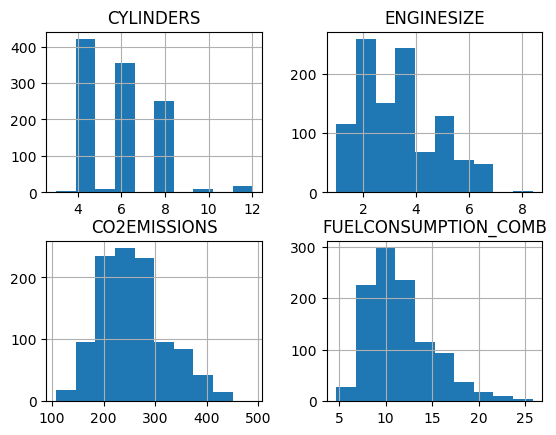

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

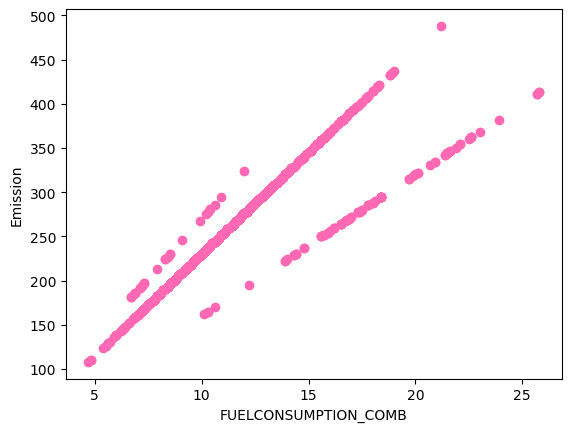

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='hotpink')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

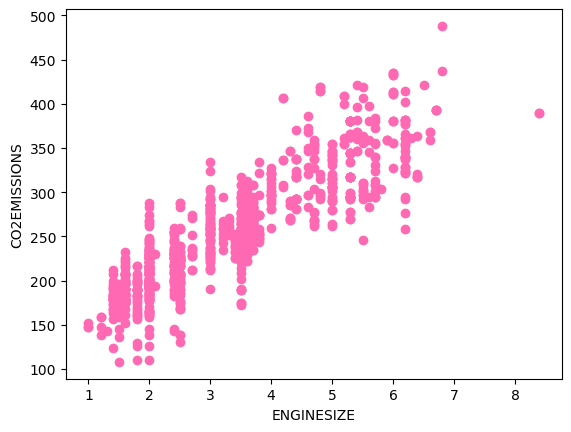

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color= 'hotpink')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

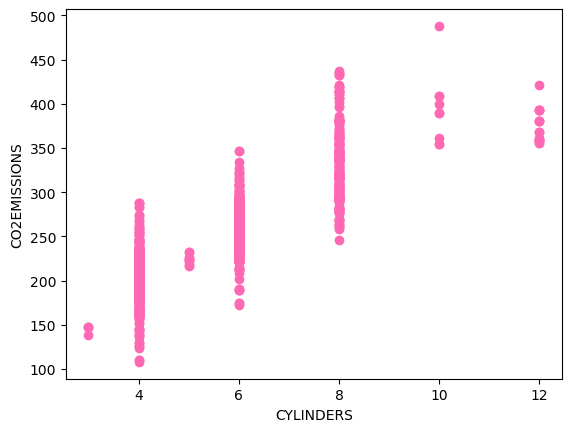

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color= 'hotpink')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

## Dividing the data into Training set and Testing set

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Here we split the data as- 80% training and 20% testing

## Simple Regression Models

### Regression Model of Engine vs Emissions

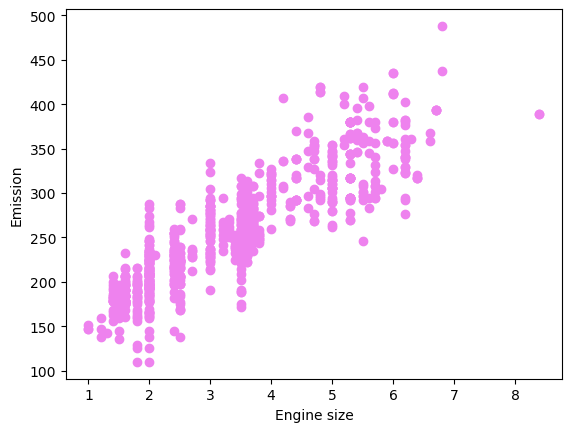

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='violet')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [12]:
from sklearn import linear_model

## Modeling

In [13]:
reg= linear_model.LinearRegression()

#np.asanyarray- converts any input into an array

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x, train_y)

print ('Coefficient: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficient:  [[38.89130331]]
Intercept:  [126.1830905]


In [14]:
print('Equation of line: y = ',reg.coef_,'x + ',reg.intercept_ )

Equation of line: y =  [[38.89130331]] x +  [126.1830905]


## Plot Outputs

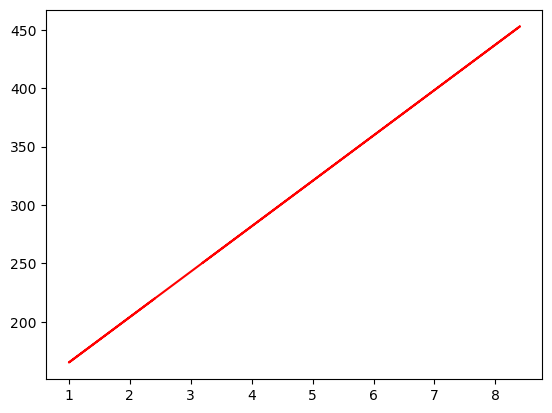

In [15]:
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')


<ipython-input-16-45a1c129da17>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r', color='black')


Text(0, 0.5, 'Emission')

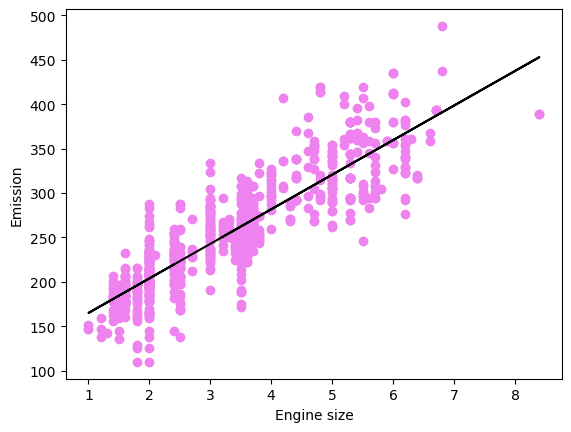

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='violet')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r', color='black')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [17]:
from sklearn.metrics import r2_score


## Evaluation

In [18]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )
r2_e=r2_score(test_y , test_y_)

Mean absolute error: 24.60
Residual sum of squares (MSE): 1057.16
R2-score: 0.76


### Regression Model of Fuel Consumption vs Emissions

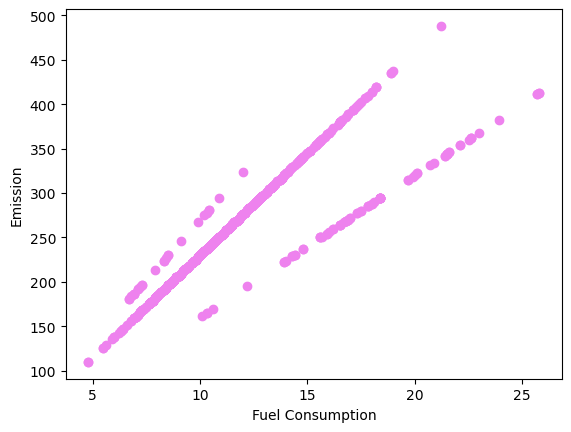

In [19]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='violet')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.show()

## Modeling

In [20]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x, train_y)

print ('Coefficient: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficient:  [[15.72192499]]
Intercept:  [73.52411565]


In [21]:
print('Equation of line: y = ',reg.coef_,'x + ',reg.intercept_ )

Equation of line: y =  [[15.72192499]] x +  [73.52411565]


## Plot Outputs

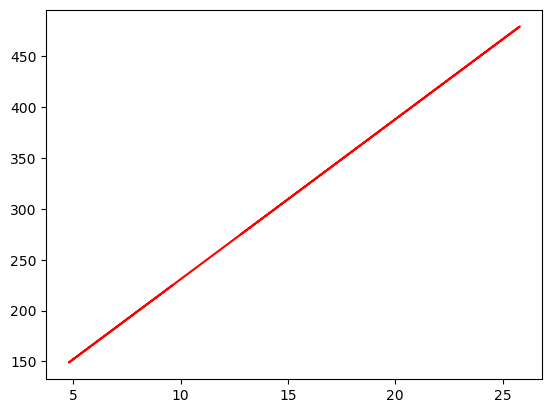

In [22]:
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')


<ipython-input-23-ddb4bab62e5d>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r', color='green')


Text(0, 0.5, 'Emission')

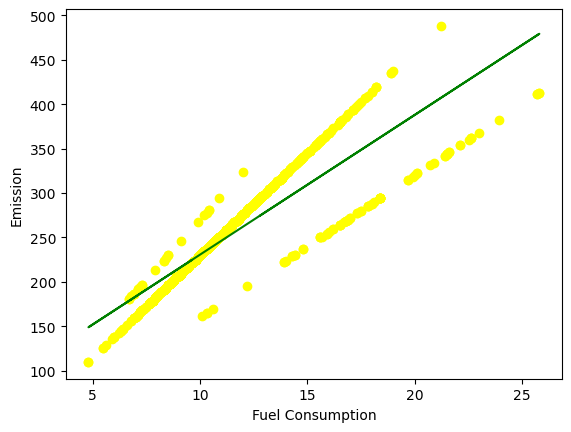

In [23]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='yellow')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r', color='green')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")

## Evaluation

In [24]:
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_)) 
r2_f=r2_score(test_y , test_y_)

Mean absolute error: 19.59
Residual sum of squares (MSE): 695.89
R2-score: 0.84


### Regression Model of Cylinders vs Emissions

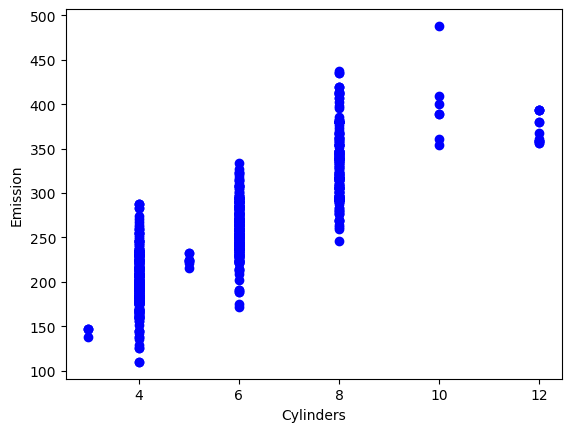

In [25]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

## Modeling

In [26]:
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x, train_y)

print ('Coefficient: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficient:  [[29.69736247]]
Intercept:  [84.0860893]


In [27]:
print('Equation of line: y = ',reg.coef_,'x + ',reg.intercept_ )

Equation of line: y =  [[29.69736247]] x +  [84.0860893]


## Plot Outputs

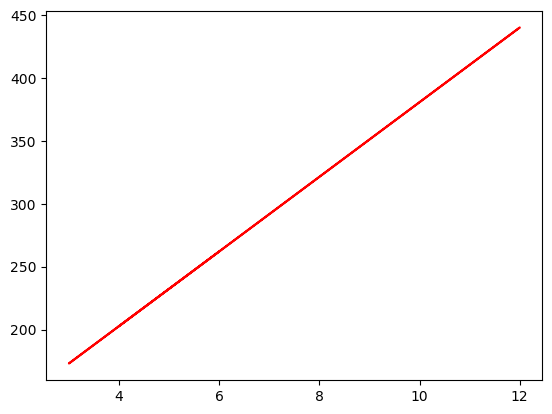

In [28]:
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')


<ipython-input-29-c85b71751731>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r', color='hotpink')


Text(0, 0.5, 'Emission')

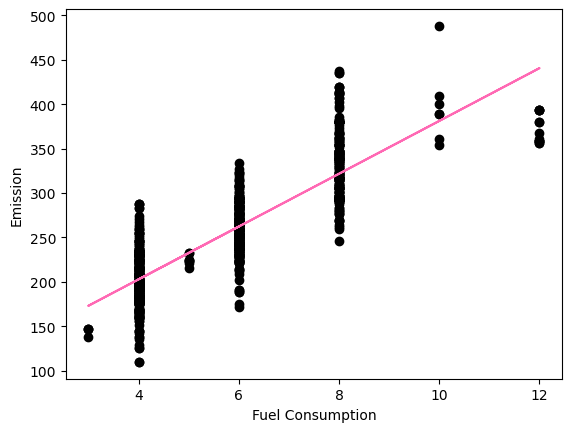

In [29]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='black')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r', color='hotpink')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")

## Evaluation

In [30]:
test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )
r2_c=r2_score(test_y , test_y_)

Mean absolute error: 27.70
Residual sum of squares (MSE): 1274.34
R2-score: 0.71


# Conclusion

In [31]:
print("R2 score for Engine", r2_e)
print("R2 score for Fuel Consumption", r2_f)
print("R2 score for Cylinders", r2_c)


R2 score for Engine 0.758741049722327
R2 score for Fuel Consumption 0.8411883618365987
R2 score for Cylinders 0.7091793256592075


# The Engine vs CO2 Emission model is the most accurate


#### Note: 

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE): The RMSE is a quadratic scoring rule which measures the average magnitude of the error

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
